In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
wider_20p0 = np.load('Run_040118/bolp_20p0_um_0_wider.npz')

In [3]:
wider_20p0.files

['i', 'func_all', 'param']

In [4]:
Npert = 5000

In [5]:
p0_20p0 = np.array((1.14385,13.28584,0.34846,11.30750,11.97186,0.,0.))
dp_range = np.array((0.11,0.4,0.225,0.9,0.2,1.,1.))

In [6]:
def poly(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [7]:
def fit_poly_derivative(param,func,p0,ip,jf,n,plot=0):
    a,b,c,d = np.polyfit(param,func,3)
    slope0 = 3*a*p0**2+2*b*p0+c
    if plot:
        plt.figure()
        plt.plot(param,func,'b.',alpha=0.02)
        prange = np.linspace(min(param),max(param),100)
        plt.plot(prange,poly(prange,a,b,c,d),'r-')
        plt.axvline(p0,linestyle=':',color='grey')
        plt.title(slope0)
        plt.savefig(str('Run_040118/bolp20p0_wider_test'+'/p{}f{}_{}').format(ip,jf,n))
        plt.close()
    return slope0

In [10]:
poly_deriv = np.zeros((7,160,100))

In [11]:
for i in range(7):
    param = wider_20p0['param'][i*Npert:i*Npert+Npert,i]
    func = wider_20p0['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_20p0[i]
    for j in range(160):
        print j
        funcj = func[:,j]
        for n in range(100):
            idx = np.random.choice(5000,(50+50*n),replace=0)
            poly_deriv[i,j,n] = fit_poly_derivative(param[idx],funcj[idx],p0,i,j,n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


In [12]:
for i in range(7):
    for j in range(160):
        plt.figure()
        plt.plot(np.arange(1,101)*50,poly_deriv[i,j]/poly_deriv[i,j,-1])
        plt.axhline(1,linestyle=':',color='grey')
        plt.ylim((0,2))
        plt.savefig(str('Run_040118/bolp20p0_wider_test'+'/p{}f{}').format(i,j))
        plt.close()

In [13]:
for i in range(7):
    param = wider_20p0['param'][i*Npert:i*Npert+Npert,i]
    func = wider_20p0['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_20p0[i]
    for j in range(160):
        funcj = func[:,j]
        fit_poly_derivative(param,funcj,p0,i,j,'all',plot=1)

In [14]:
import halotools

from halotools.sim_manager import CachedHaloCatalog

halocat = CachedHaloCatalog(simname='bolplanck',version_name='halotools_v0p4',redshift=0,halo_finder='rockstar')

from HOD_models import decorated_hod_model


model = decorated_hod_model()

model.populate_mock(halocat)

In [15]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [16]:
p_for_ngal = np.zeros((7,51))
ngal = np.zeros((7,51))
for i in range(7):
    print i
    p = p0_20p0*1.
    for j in range(51):
        p[i] = p0_20p0[i]-dp_range[i]+j*dp_range[i]/25.
        print j
        p_for_ngal[i,j] = p[i]
        model.param_dict.update(dict(zip(param_names, p)))
        ngal[i,j] = ((np.sum(model.mean_occupation_centrals(table=model.mock.halo_table))+\
                np.sum(model.mean_occupation_satellites(table=model.mock.halo_table)))/(250.**3))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


0.000306629889581 0.000304133110574 1.0082094942
-0.00375213491535 -0.00375169854975 1.00011631148
0.00375236914574 0.00375456613932 0.999414847548
-0.00026951216917 -0.000270447207013 0.996542623409
-0.0106049818492 -0.010611105774 0.999422875906
1.18320178412e-07 -7.28629960764e-07 -0.162387198968
2.87189499702e-05 2.87373567889e-05 0.99935948115


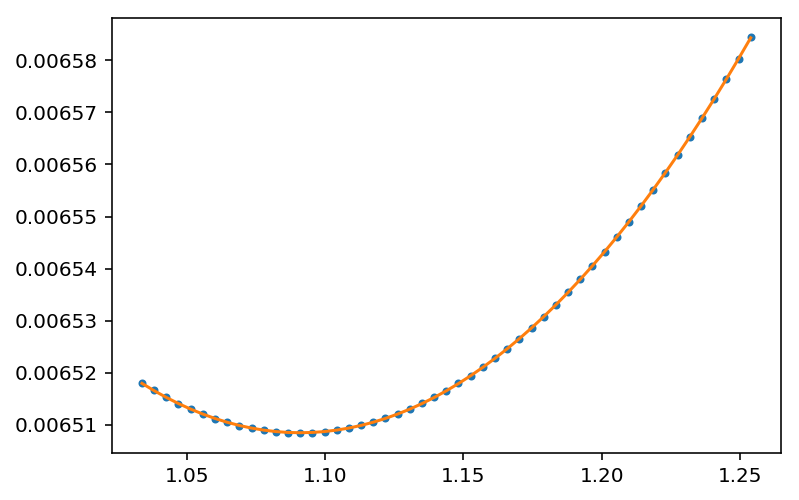

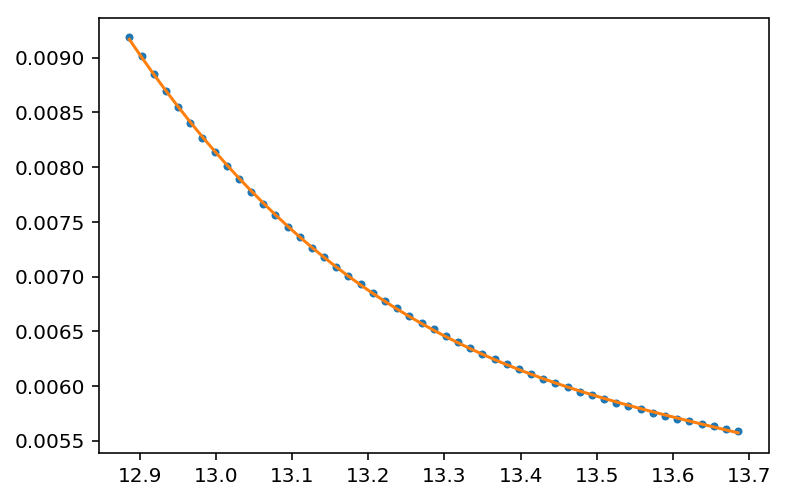

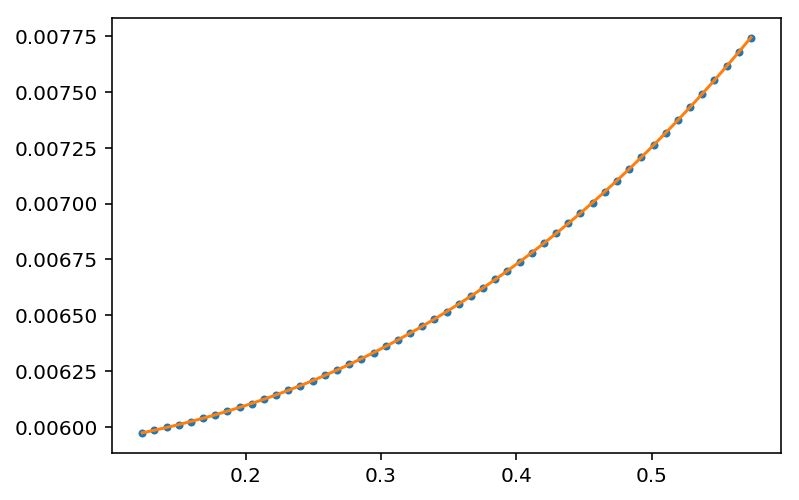

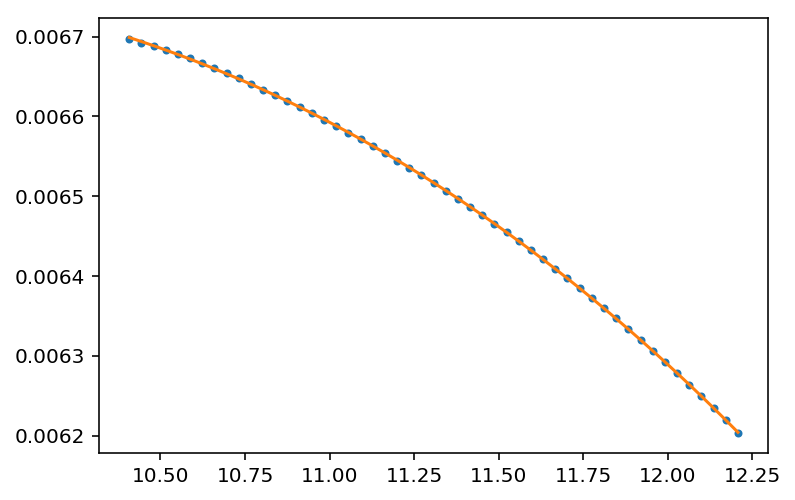

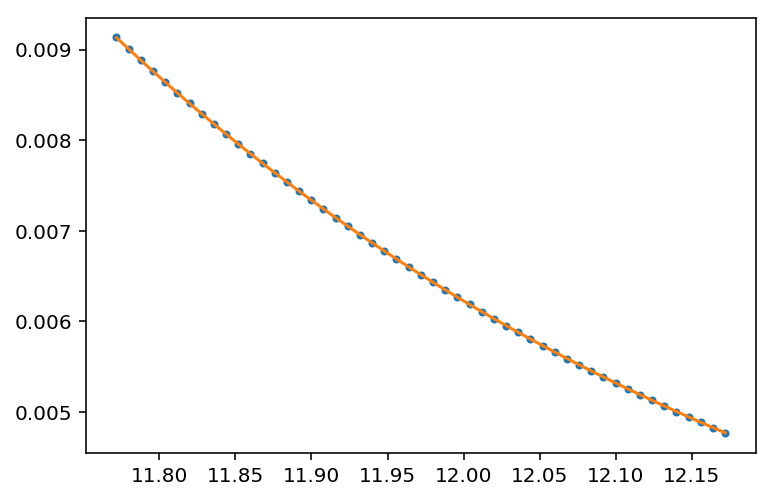

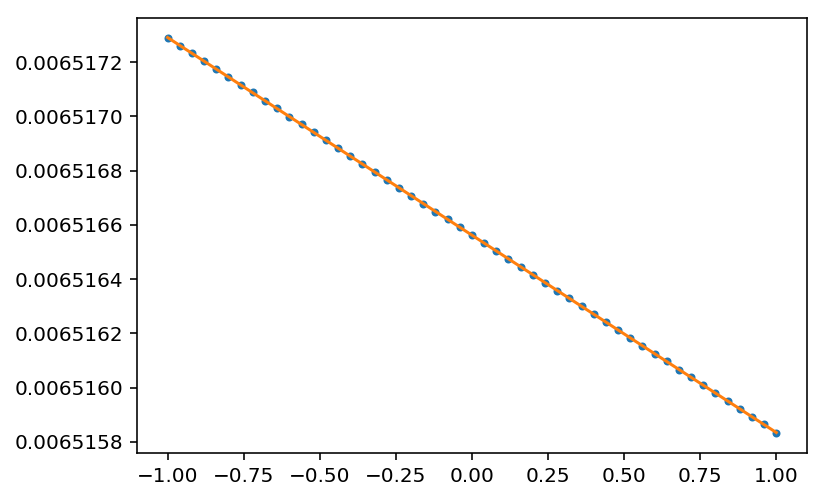

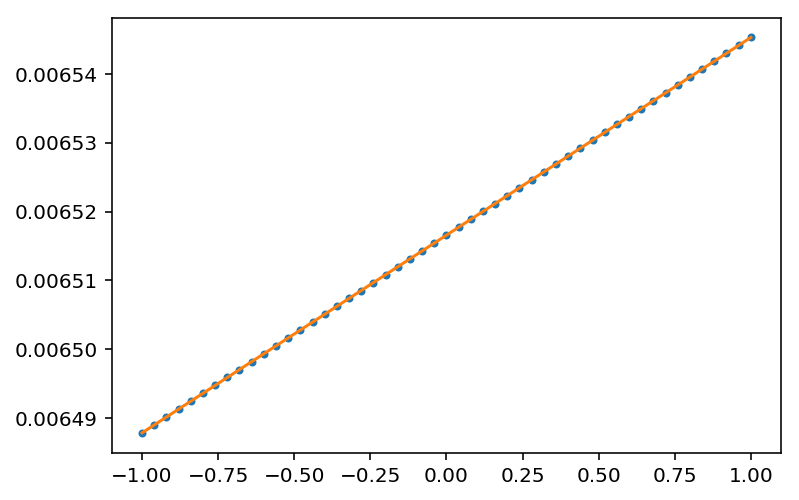

In [18]:
for i in range(7):
    plt.figure()
    plt.plot(p_for_ngal[i],ngal[i],'.')
    a,b,c,d = np.polyfit(p_for_ngal[i],ngal[i],3)
    dngal_dp = 3*a*p0_20p0[i]**2+2*b*p0_20p0[i]+c
    plt.plot(p_for_ngal[i],poly(p_for_ngal[i],a,b,c,d))
    print poly_deriv[i,0,-1],dngal_dp,poly_deriv[i,0,-1]/dngal_dp

In [19]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [20]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [21]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [41]:
poly_deriv[5,0,:] = 0

poly_deriv[6,0,:] = 0

In [42]:
fid_20p0 = np.load('Run_040118/bolp_20p0_0.npz')

In [43]:
calc_1sigma(calc_fisher(poly_deriv[:,:,-1],calc_cov(fid_20p0['func_all_cov'],fid_20p0['func_all'])))

array([ 0.02559694,  0.02172895,  0.03895968,  0.66902037,  0.0195801 ,
        0.20009057,  0.16297714])

In [44]:
one_sigma = np.zeros((50,7))
cov = calc_cov(fid_20p0['func_all_cov'],fid_20p0['func_all'])
for i in range(50):
    print i
    one_sigma[i] = calc_1sigma(calc_fisher(poly_deriv[:,:,i*2+1],cov))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


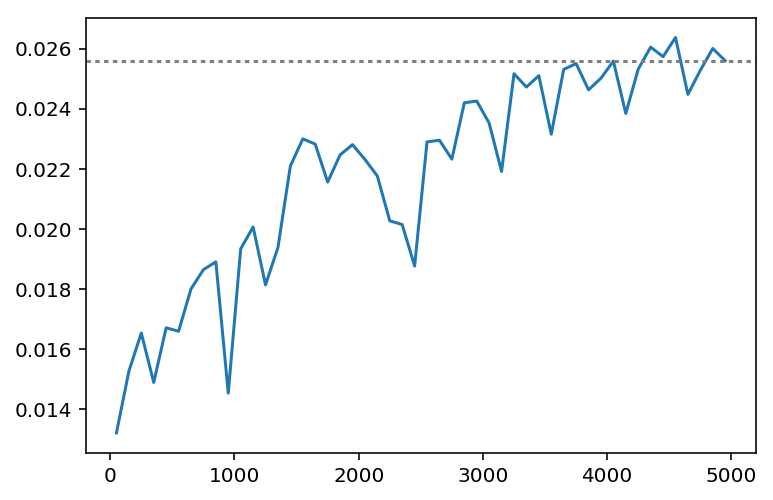

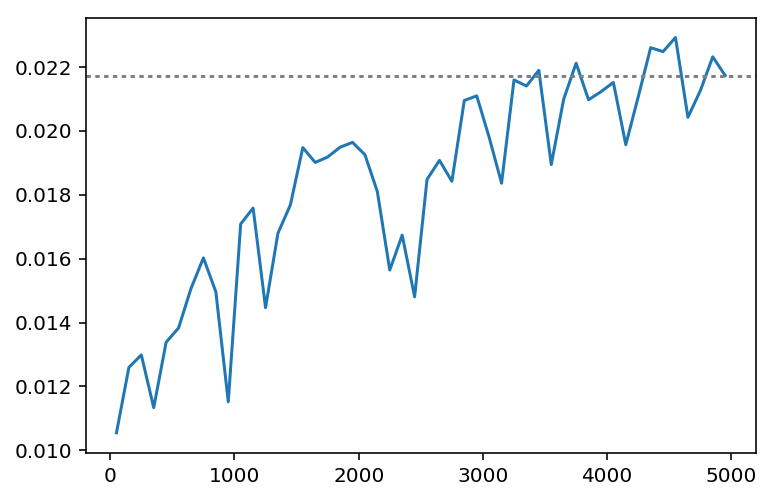

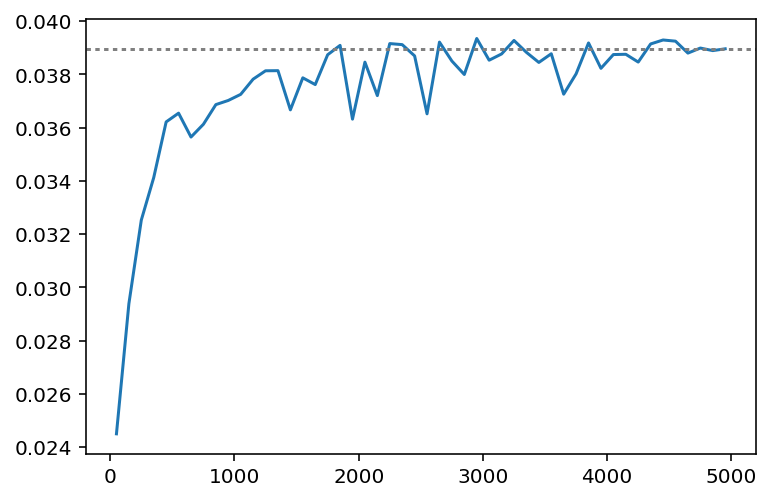

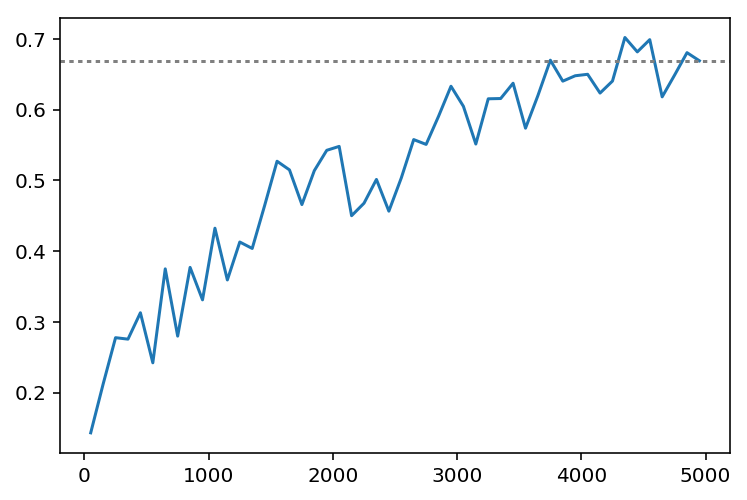

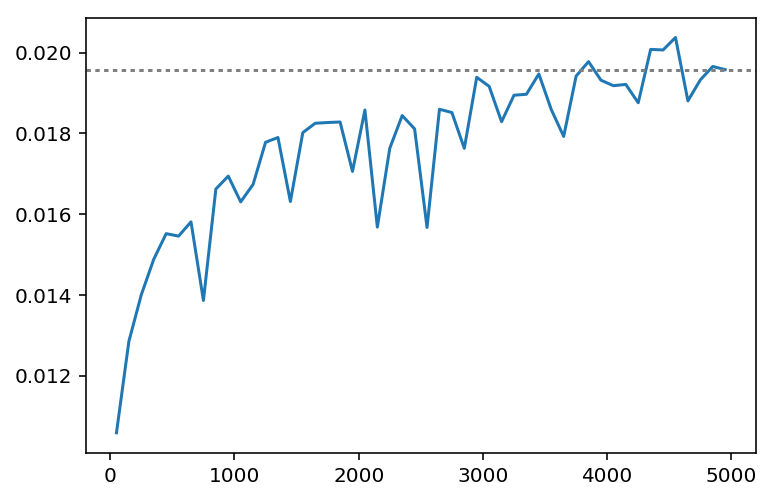

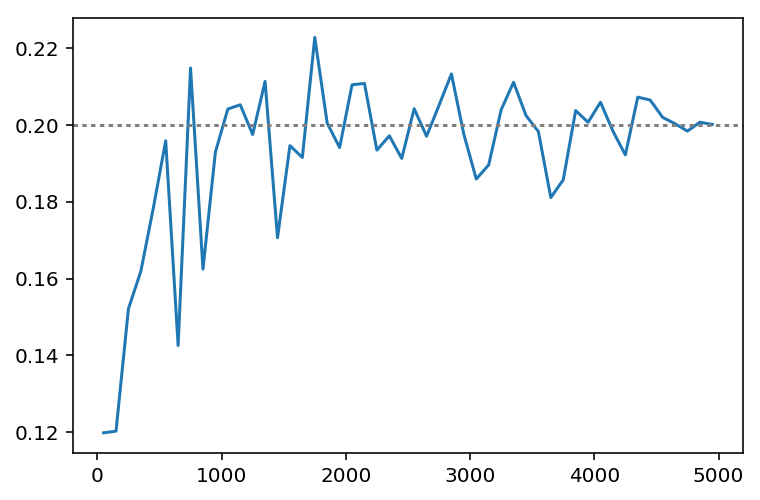

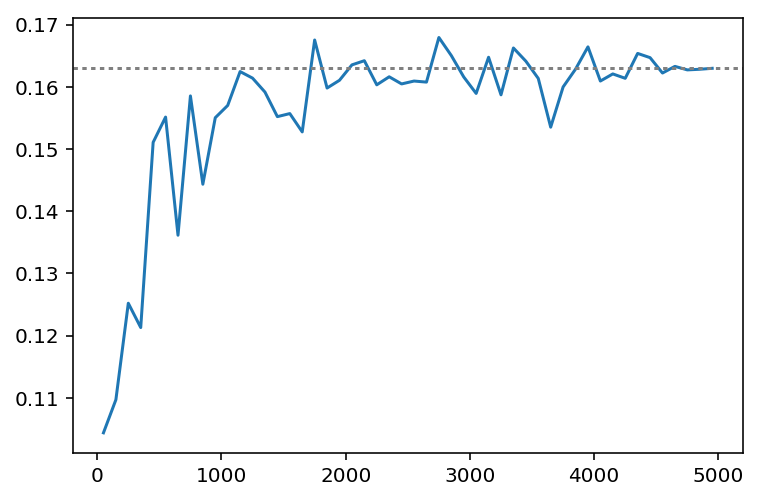

In [45]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma[:,i])
    plt.axhline(one_sigma[-1,i],linestyle=':',color='grey')

In [46]:
def calc_1sigma_prior(fisher,prior_i,prior_inv_s2):
    fisher[prior_i,prior_i] += prior_inv_s2
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [47]:
one_sigma_pp = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,:,i*2+1],cov),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


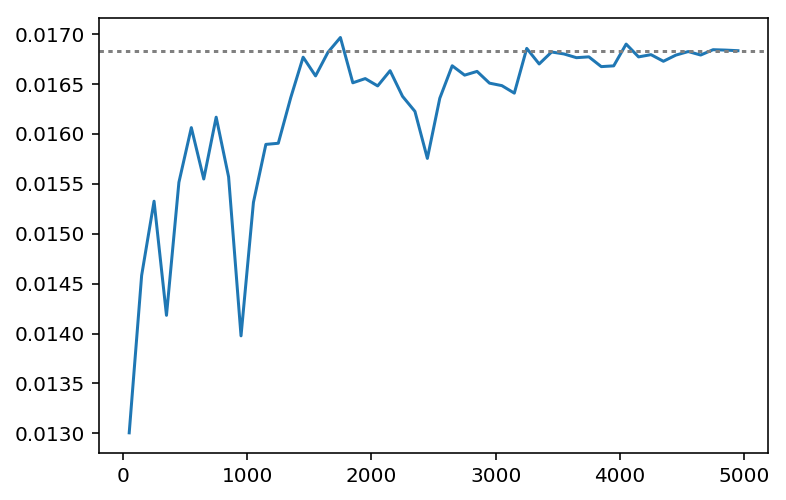

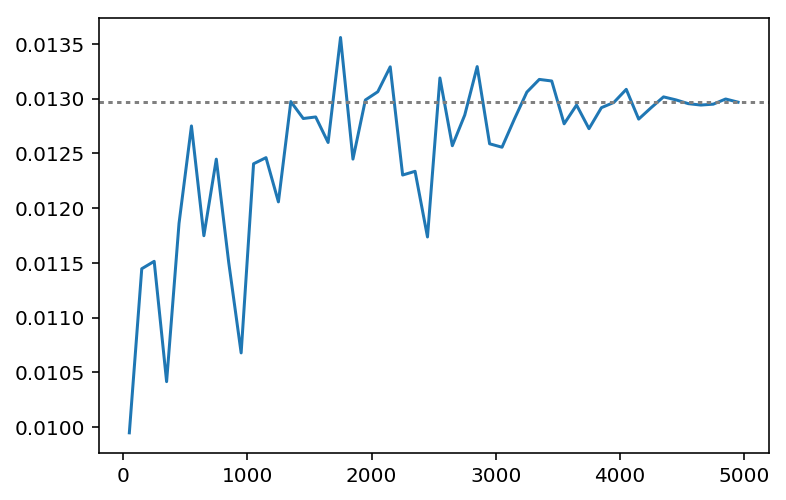

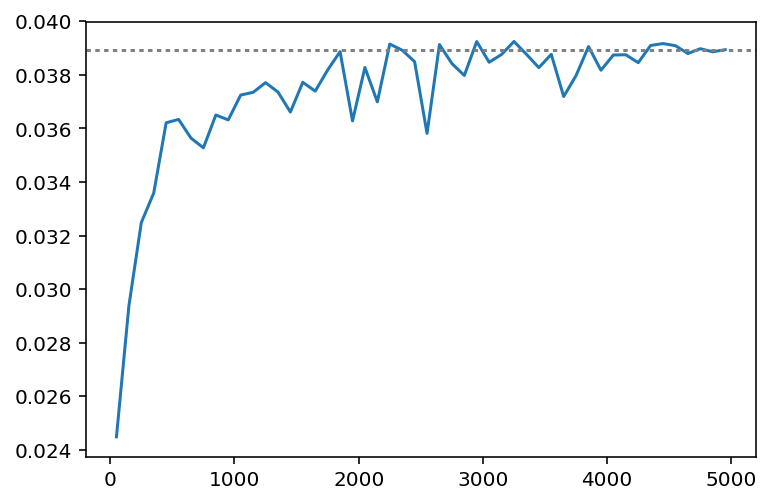

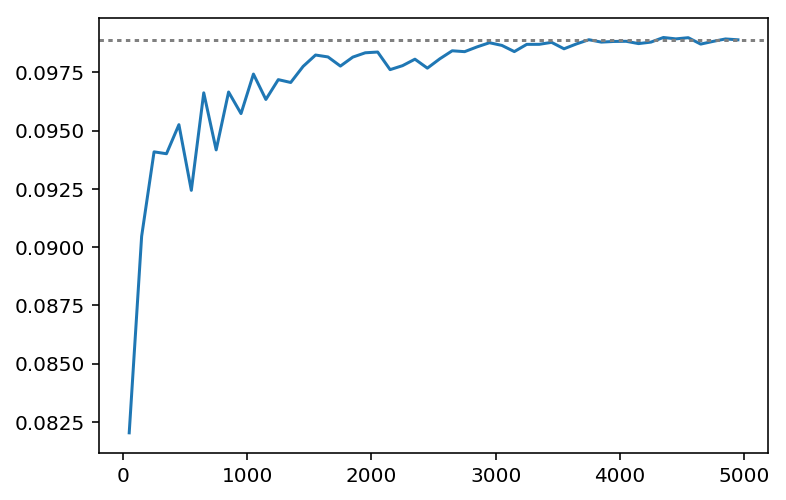

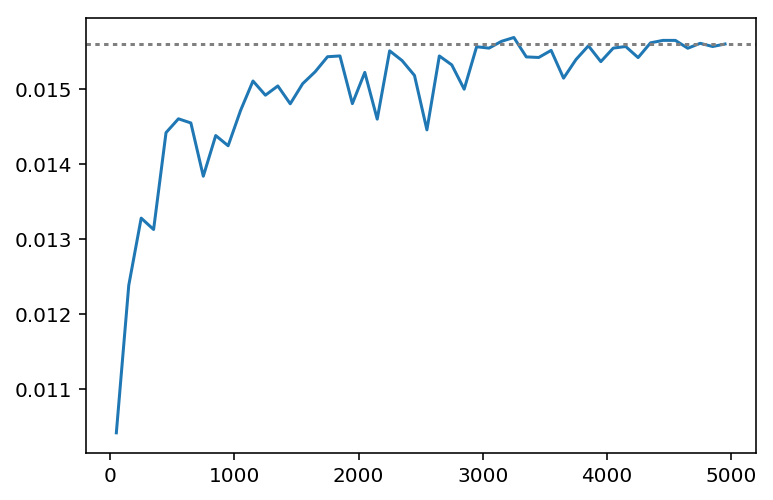

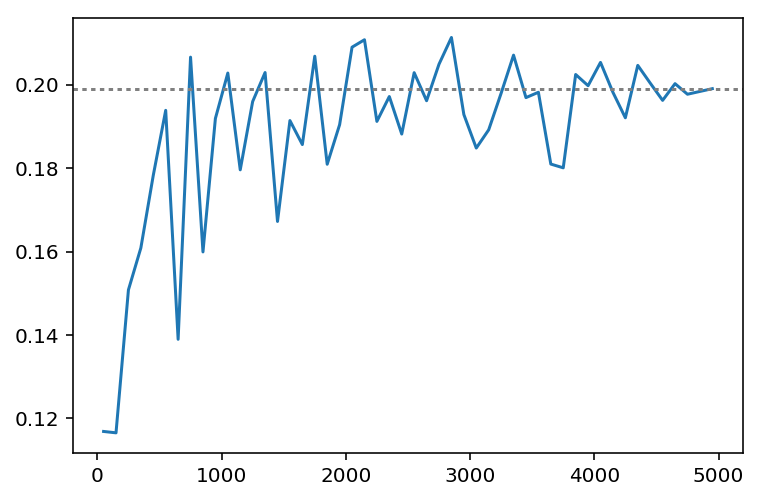

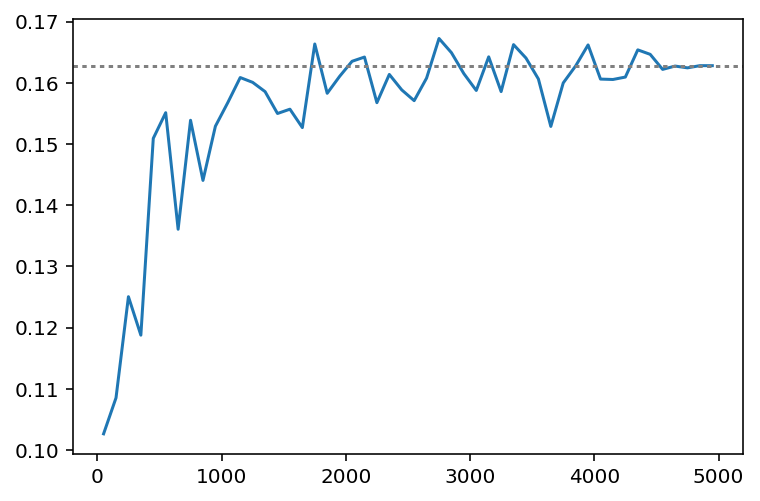

In [48]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i])
    plt.axhline(one_sigma_pp[-1,i],linestyle=':',color='grey')

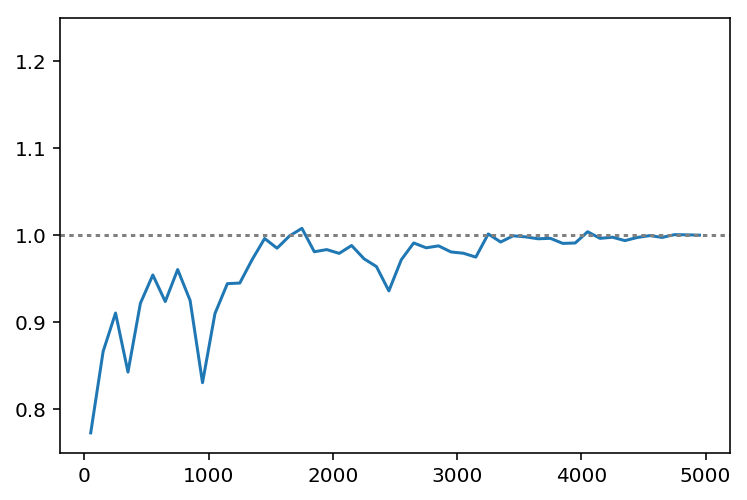

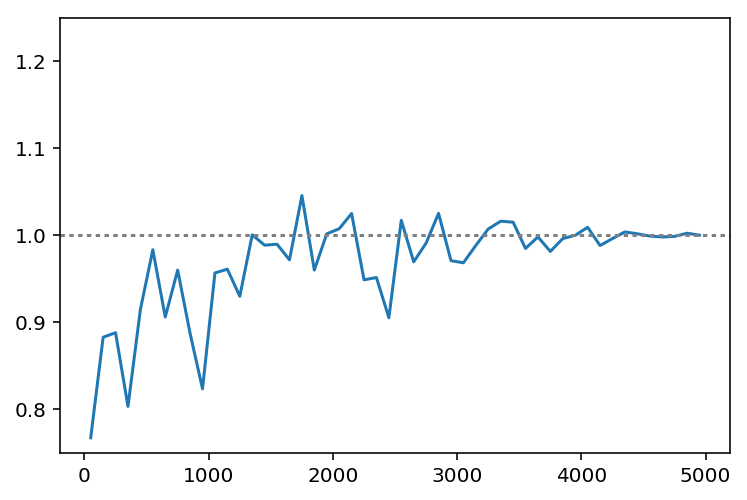

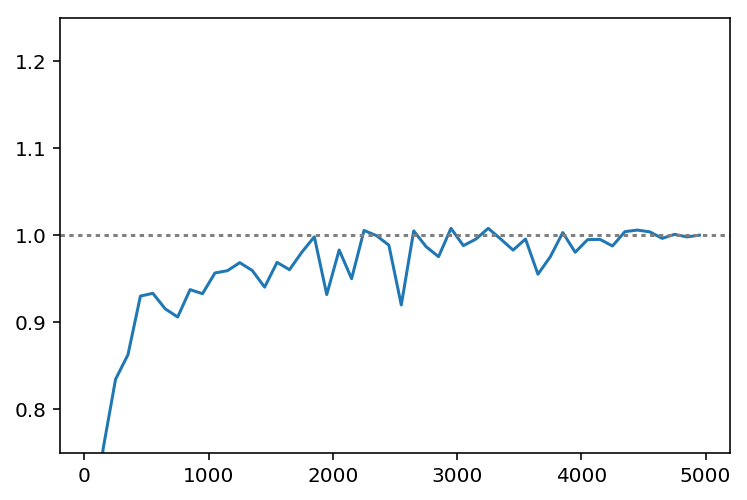

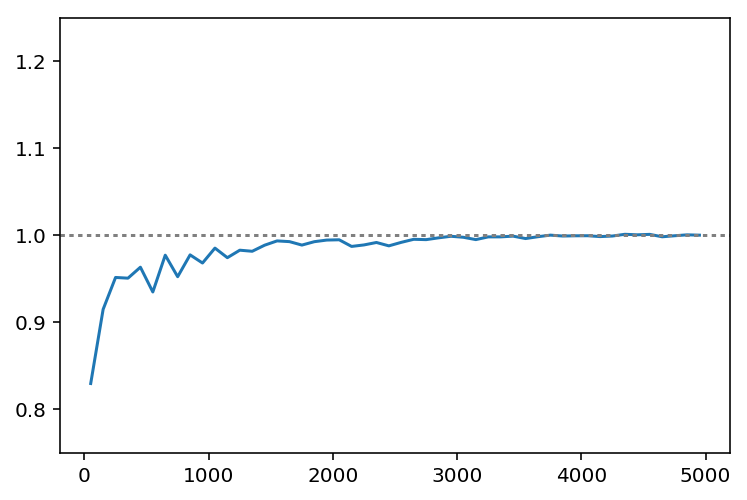

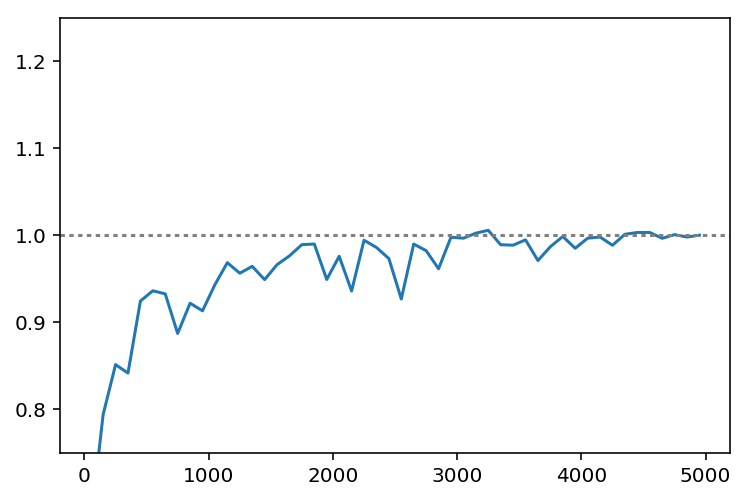

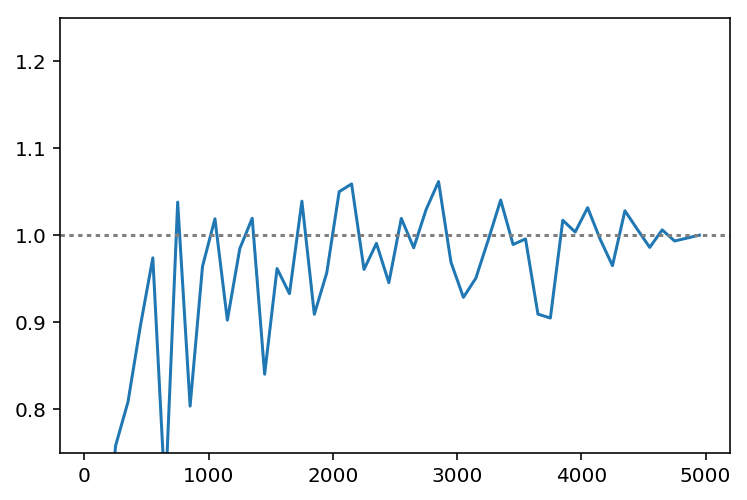

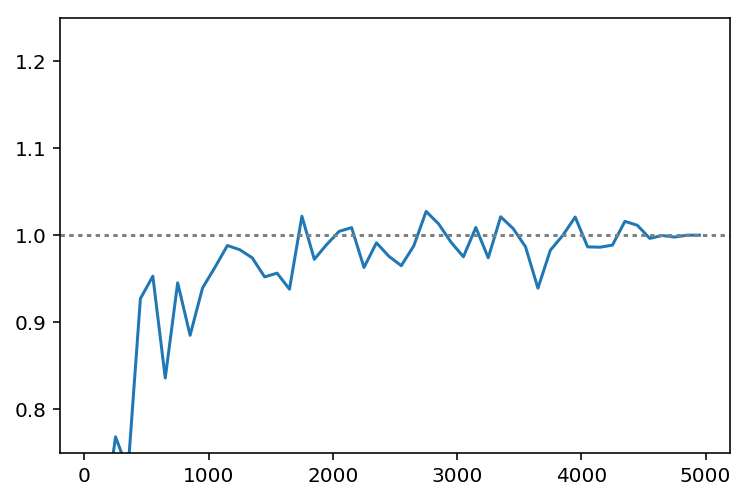

In [49]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i]/one_sigma_pp[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [50]:
one_sigma_pp_wp = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_wp[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,:30,i*2+1],cov[:30,:30]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [51]:
one_sigma_pp_wp[-1]

array([ 0.03396597,  0.03359006,  0.45665015,  0.09987164,  0.16538906,
        0.66080793,  0.51459242])

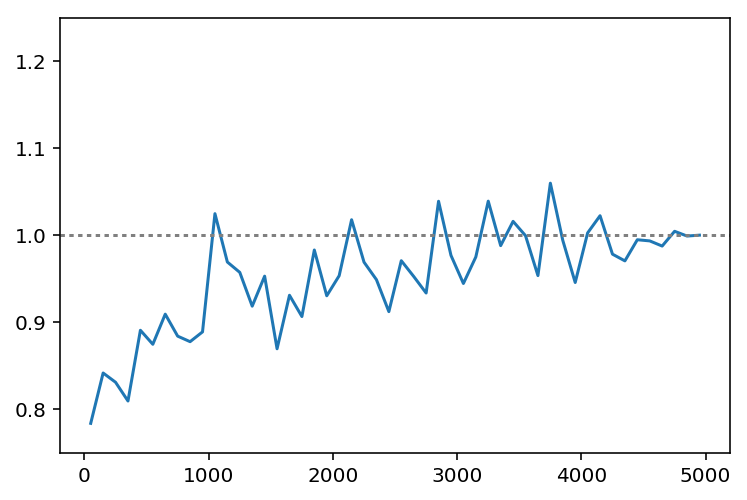

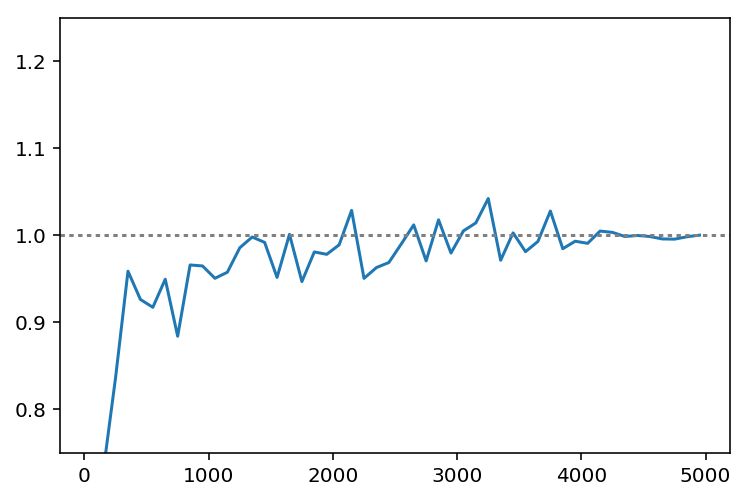

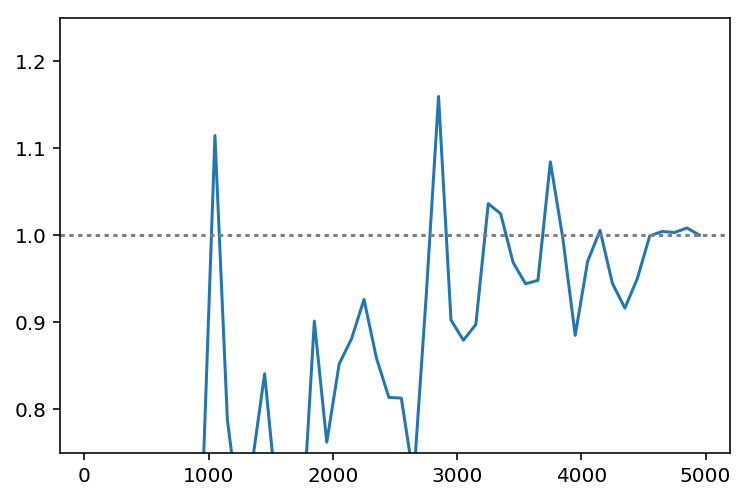

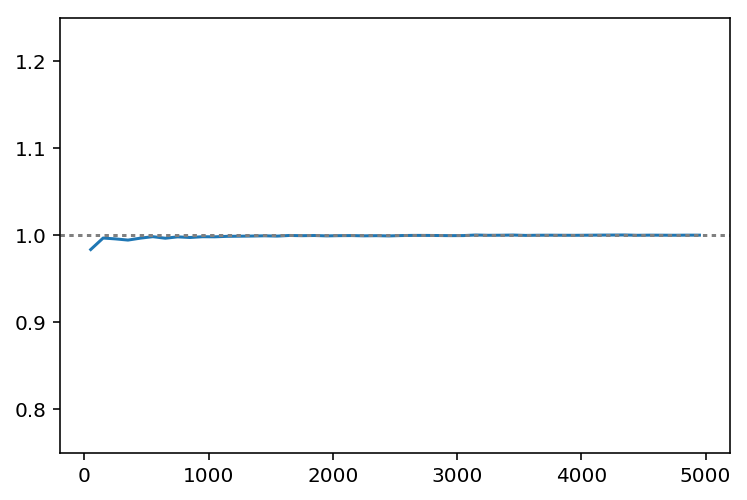

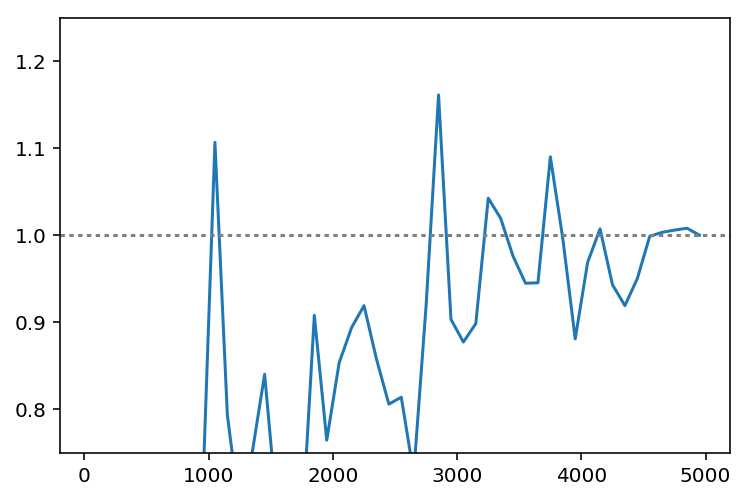

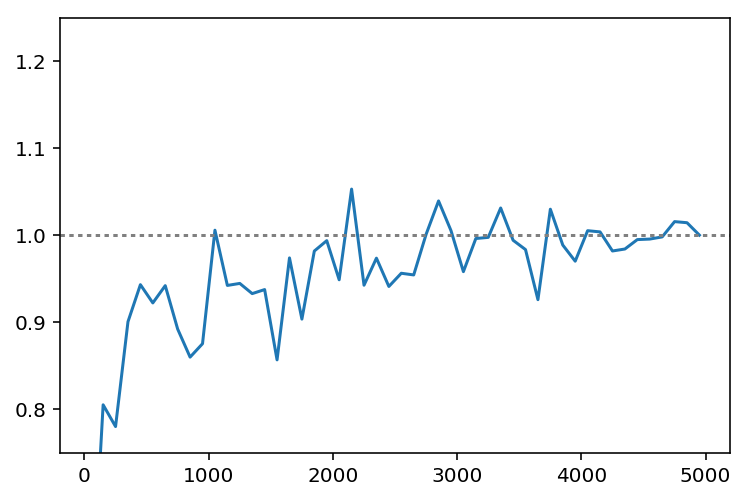

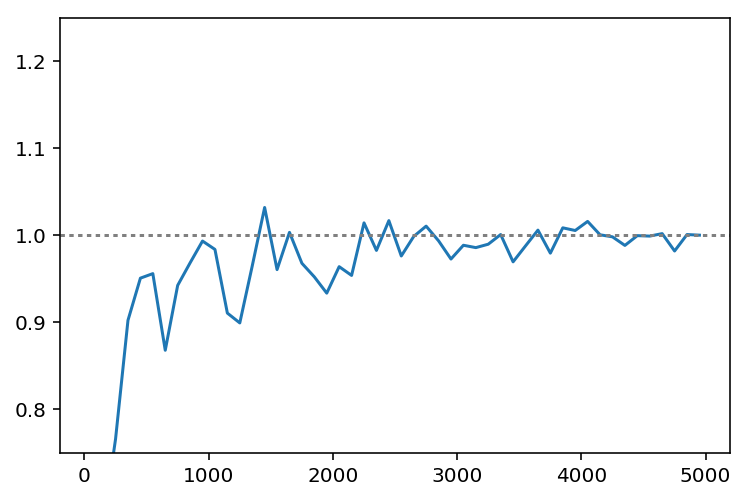

In [52]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp_wp[:,i]/one_sigma_pp_wp[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [53]:
one_sigma_pp_ds = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_ds[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,30:60,i*2+1],cov[30:60,30:60]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


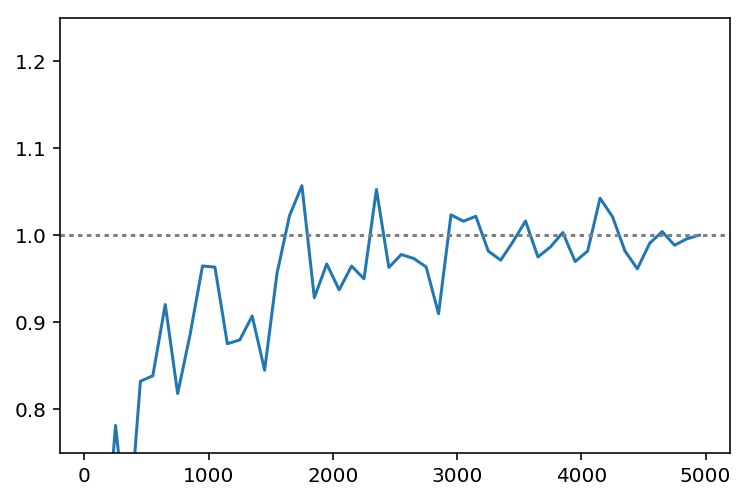

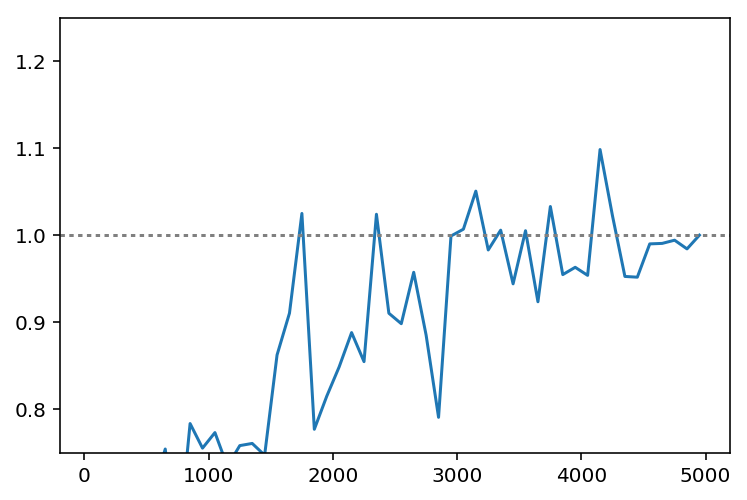

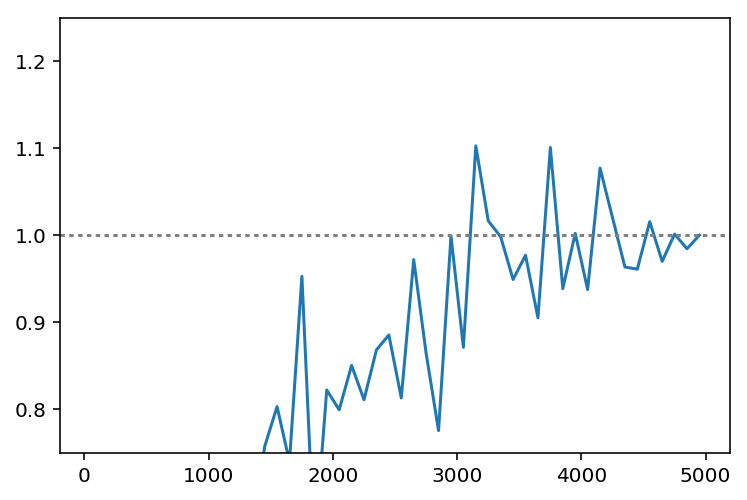

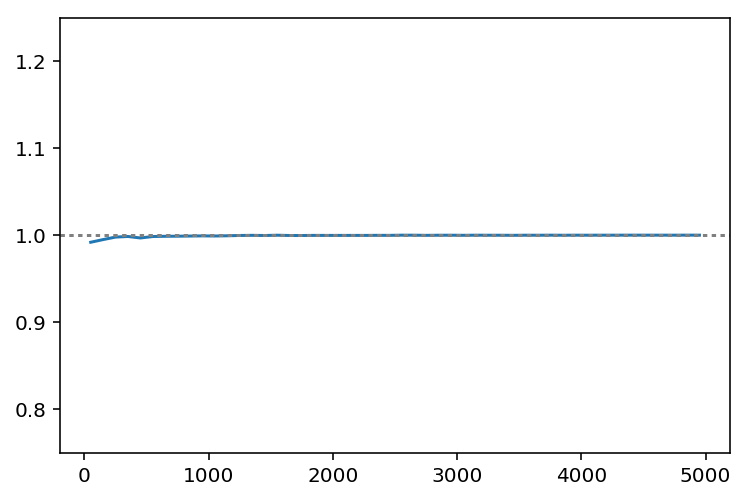

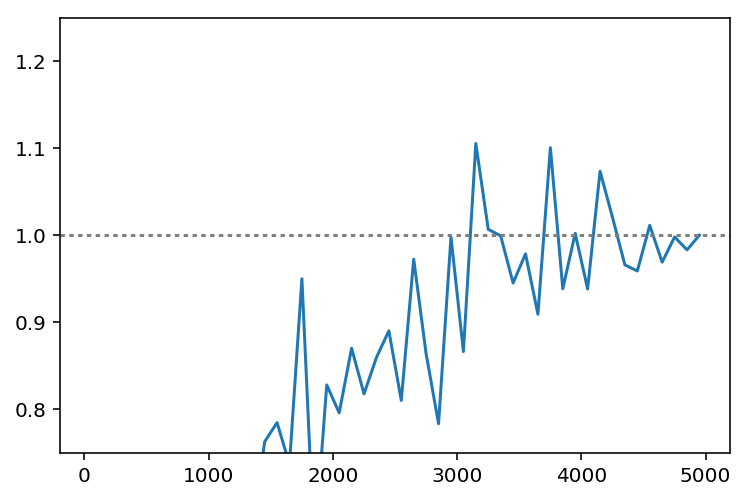

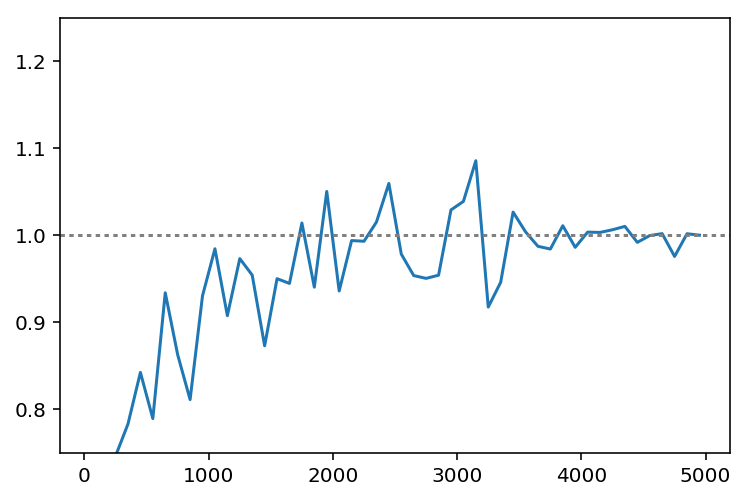

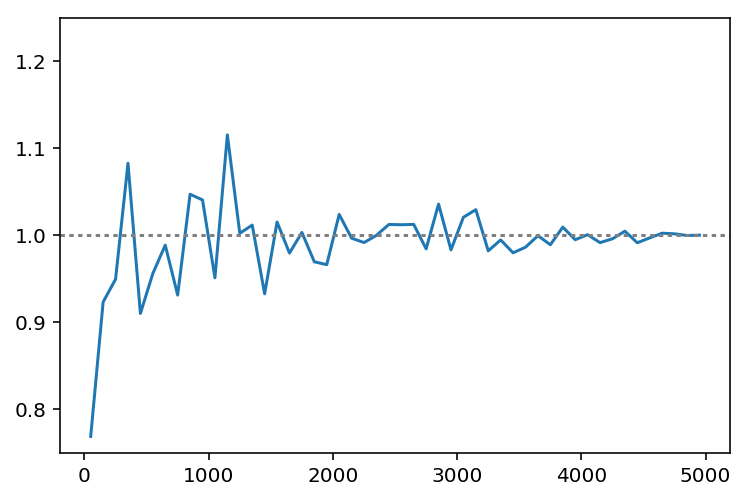

In [54]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp_ds[:,i]/one_sigma_pp_ds[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [55]:
one_sigma_pp_vpf = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_vpf[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,60:90,i*2+1],cov[60:90,60:90]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


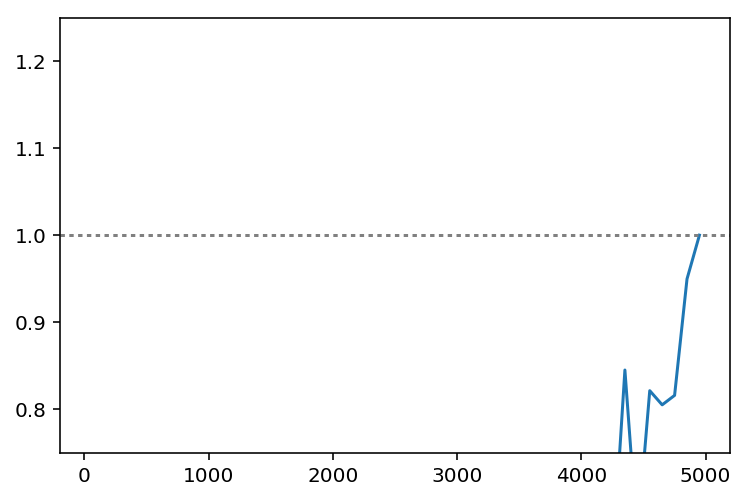

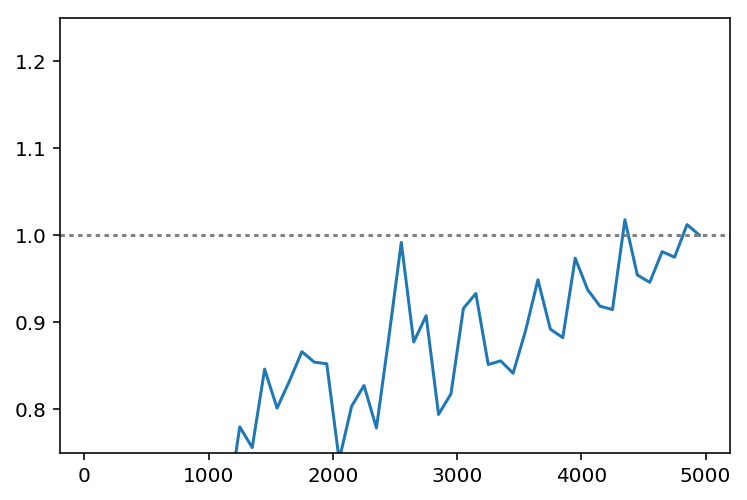

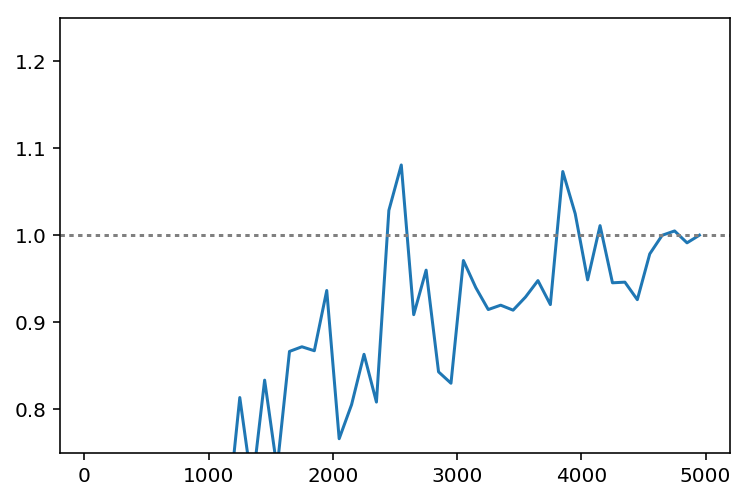

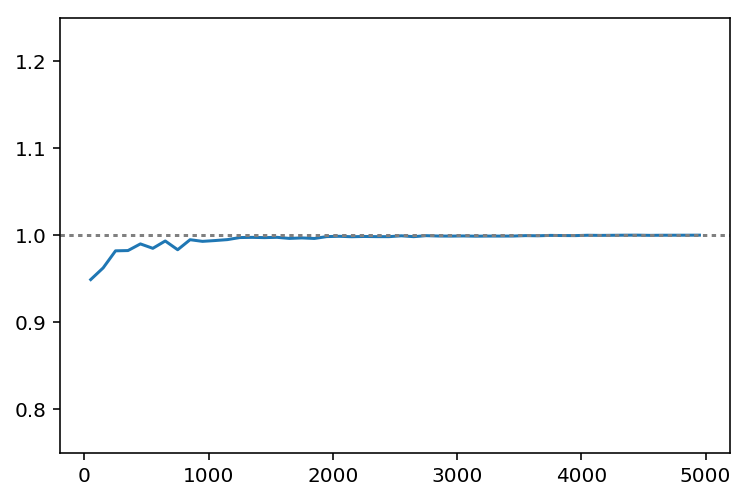

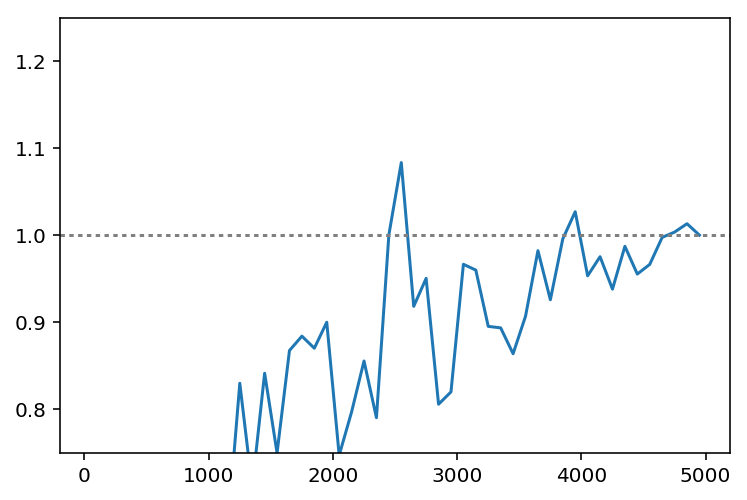

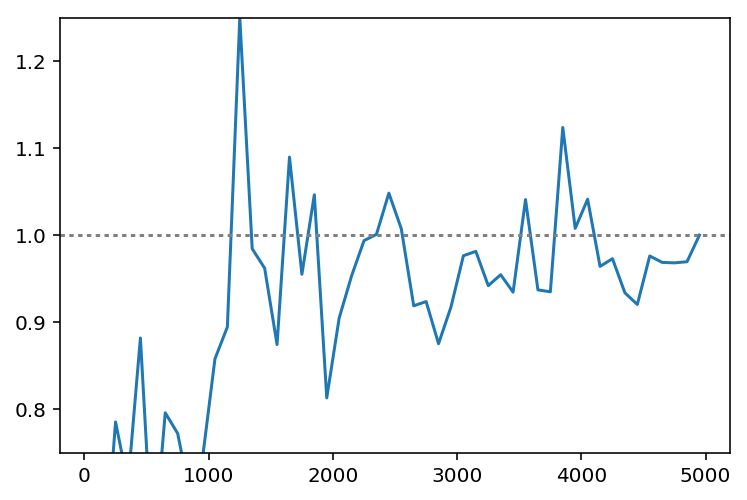

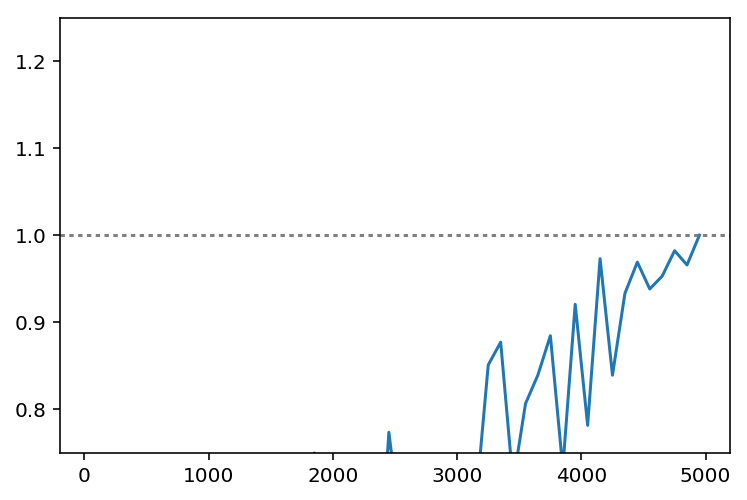

In [56]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp_vpf[:,i]/one_sigma_pp_vpf[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [57]:
one_sigma_pp_cic = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_cic[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,90:,i*2+1],cov[90:,90:]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


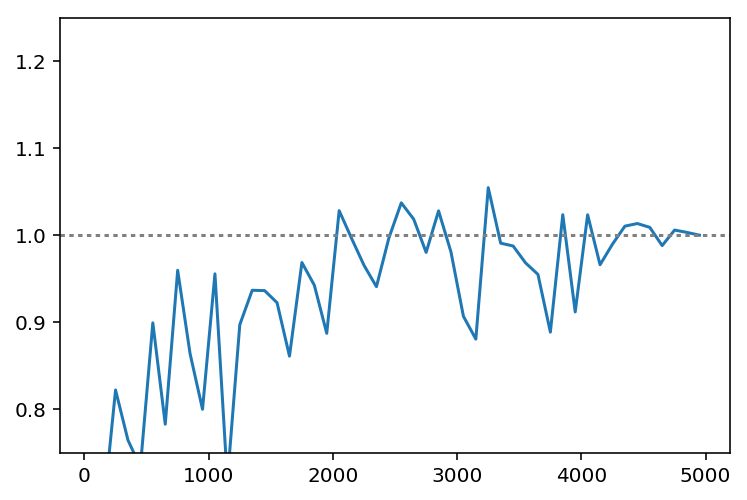

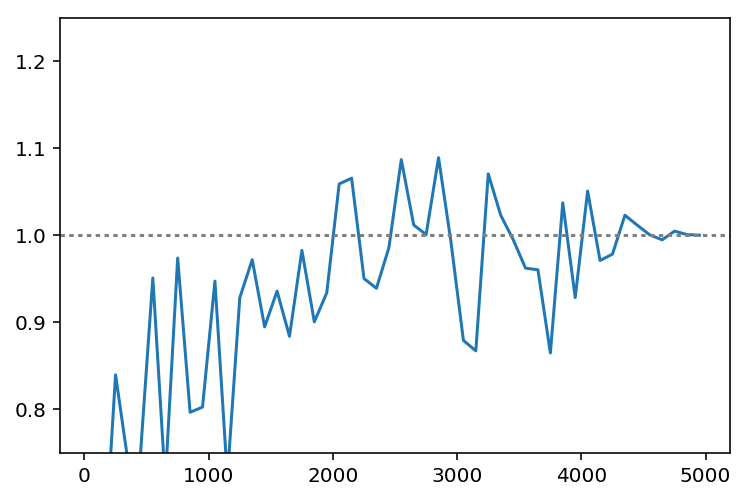

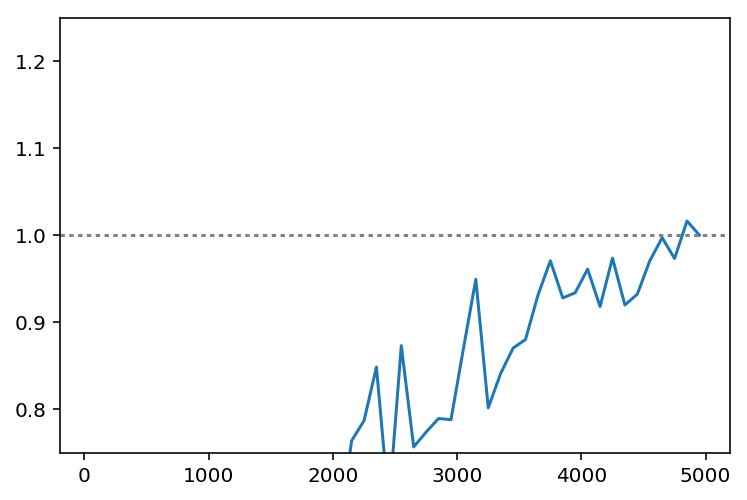

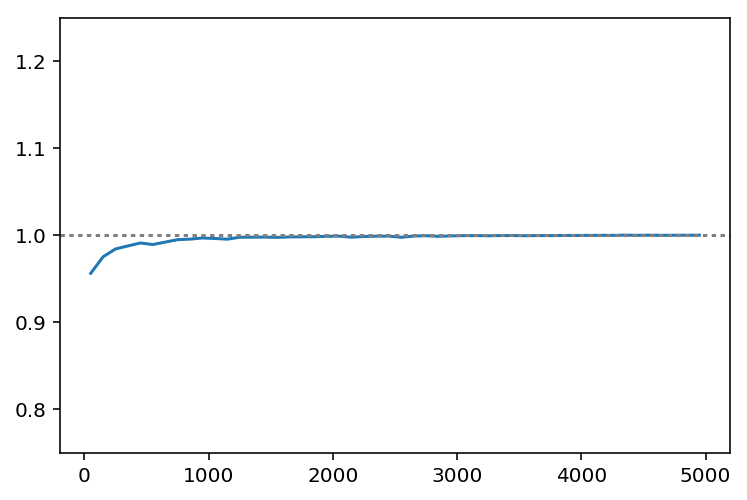

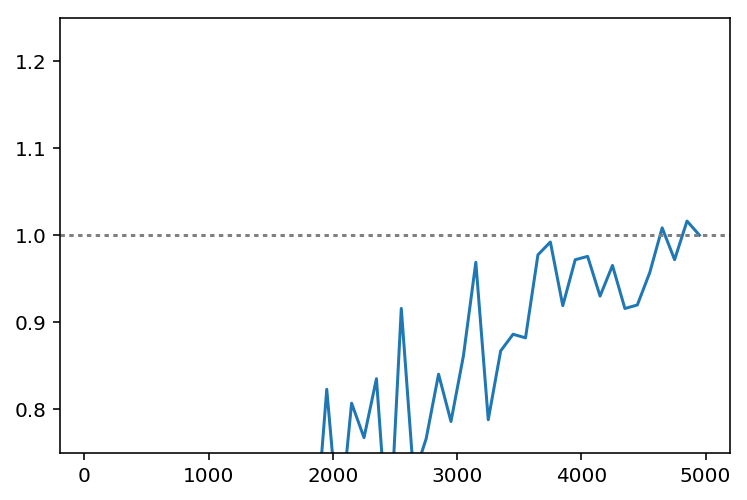

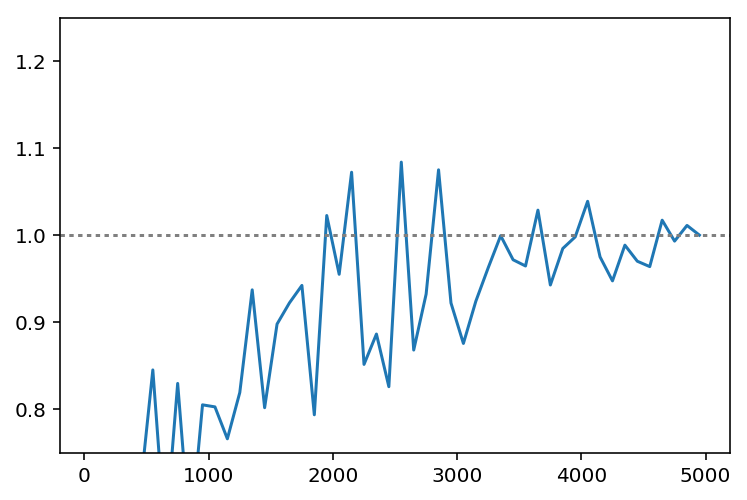

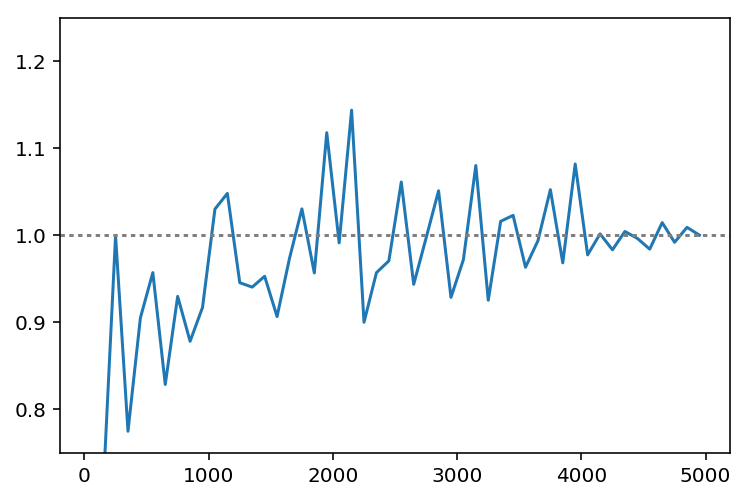

In [58]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp_cic[:,i]/one_sigma_pp_cic[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))